## Linear Regression 

####### Linear regression model makes prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).

####### Y^ = Øo + Ø1X1 + Ø2X2 + ... + ØnXn

####### Y^ --> is predicted value
####### n --> is number of features
####### Xi --> is number of features
####### Øo --> is the bias or intercept term
####### Øj --> is the j'th model parameter

####### Training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. the most common performance measure of a regression model is the Root Mean Square Error (RMSE).

####### To train Linear regression model, first we need to find the values of Ø that minimize the MSE(Mean Square Error) that leads to minimize RMSE(Root Mean Square Error)

####### Let's generate Linear looking data to test the equation

In [8]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100,1)

x_new = np.array([[0], [2]])

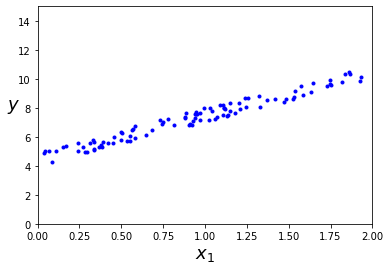

In [9]:
import matplotlib.pyplot as plt

plt.plot(x,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#### The Normal Equation

####### To find the value of θ that minimizes the cost function, there is a closed-form solution, in other words,
a mathematical equation that gives the result directly. This is called the Normal Equation.

####### θ^ = (X^T . X)^-1 . X^T . y

####### θ^ -> is the value of θ that minimizes the cost function
####### y  -> is the vector of target value from 1 to m

####### Let's compute the θ^ using Normal equation

In [11]:
x_b = np.c_[np.ones((100, 1)), x] ## add X0 to each instance
x_b.shape

(100, 2)

####### we use the inv() function to compute the inverse of a matrix & dot() method for matrix multiplication

In [13]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
# theta_best

####### Now make prediction using θ^

In [14]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)

In [15]:
y_predict

array([[ 4.53359262],
       [10.44009854]])

####### Let's plot the model prediction

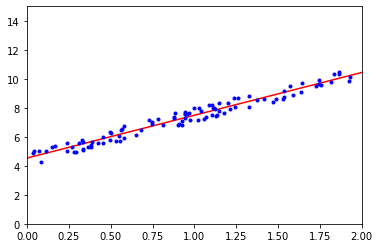

In [16]:
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"b.")
plt.axis([0, 2, 0, 15])
plt.show()

####### Let's use Linear regression from scikit learn to make prediction

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lin_reg.intercept_

array([4.53359262])

In [23]:
lin_reg.coef_

array([[2.95325296]])

In [24]:
lin_reg.predict(x_new)

array([[ 4.53359262],
       [10.44009854]])

### Gradient Descent

####### Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide
range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to
minimize a cost function.

####### it measures the local gradient of the error function with regards to the parameter vector. it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

####### Concretely, you start by filling θ with random values (this is called random initialization), and then you
improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

####### An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter.
####### If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time
####### On the other hand, if the learning rate is too high This might make the algorithm diverge, with larger
and larger values, failing to find a good solution

####### the main challenges with Gradient Descen
####### not all cost functions look like nice regular bowls, There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult.

####### Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which
means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum.

### Batch Gradient Descent

####### To calculate how much the cost function will change if we change just a little bit. This is called a partial derivative.
####### It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions). computes the partial derivative of the cost function with regards to parameter.
####### Instead of computing these partial derivatives individually, compute them all in one go. The gradient vector, contains all the partial derivatives of the cost function (one for each model parameter).
####### this involves calculations over the full training set X, at each Gradient Descent step. This is why the algorithm is called Batch Gradient Descent. it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets.

In [26]:
eta = 0.1 ### learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1) ## random intialization 

for interation in range(n_iteration):
    gradients = 2/m *x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [27]:
theta

array([[4.53359262],
       [2.95325296]])

####### Exactly as normal equation has found values for θ
####### Gradient Descent work perfectly

### Stochastic Gradient Descent

####### The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

####### Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.
####### this makes the algorithm much faster since it has very little data to manipulate at every iteration.It also makes it possible to train on huge training sets, as only one instance needs to be in memory at each iteration.

####### Due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent. Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, So once the algorithm stops, the final parameter values are good, but not optimal.

####### Let's implement Stochastic Gradient Descent using a simple learning scheduler

In [28]:
n_epoch = 50 ### epoch is each iteration round
t0, t1 = 5, 50

def learning_scheduler(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) ### random initialization

for epoch in range(n_epoch):
    for i in range(m):       #### iterate by rounds of m iterations
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_scheduler(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.5349652 ],
       [2.96950152]])

####### the Batch Gradient Descent code iterated 1,000 times through the whole training set.
####### Stochastic Gradient Descent code goes through the training set only 50 times and reaches a fairly good solution.

####### let's check performance of  Linear Regression using SGD with Scikit-Learn, & use of the SGDRegressor class, which defaults to optimizing the squared error cost function.

In [29]:
from sklearn.linear_model import SGDRegressor

#### we run 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule
### No use any regularization (penalty=None)
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=-np.infty, random_state=43) 
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=43,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.55306453]), array([2.96267621]))

####### Solution is same as the Normal Equation

### Mini-batch Gradient Descent

####### Mini-batch Gradient Descent compute the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches.

####### The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

### Polynomial Regression

####### If data is actually more complex than a simple straight line, then can use a linear model to fit nonlinear data by adding powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

####### Let's generate some Nonlinear data based on quadtratic equation Y = 0.5X^2 + X + 2 + Gaussion noise

In [45]:
m = 100
x = 6 * np.random.rand(m, 1)-3
y = 0.5 * x**2 + x + 2 + np.random.rand(m,1)

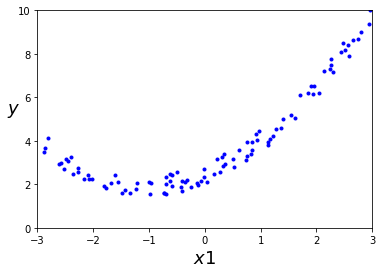

In [46]:
plt.plot(x,y,"b.")
plt.xlabel("$x1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

####### From above diagram, straight will never fit this data properly

####### let’s use Scikit-Learn’s PolynomialFeatures class to transform the training data & adding the square (2nd-degree polynomial) of each feature in the training set as new features

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]
x_poly[0]

array([2.56957181, 6.60269927])

####### Now x_poly contains the original feature of X plus the square of this feature.

####### Let's fit LinearRegression model to this extended training data

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_

array([2.43202242])

In [74]:
lin_reg.coef_

array([[1.03788783, 0.49485432]])

In [75]:
x_new=np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = poly_features.transform(x_new)
y_predict = lin_reg.predict(x_new_poly)

No handles with labels found to put in legend.


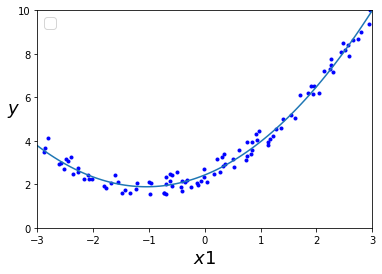

In [77]:
plt.plot(x,y,"b.")
plt.plot(x_new, y_predict)
plt.xlabel("$x1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.legend(loc="upper left", fontsize=14)
plt.show()

####### when there are multiple features, Polynomial Regression is capable of finding relationships between features which is something a plain Linear Regression model cannot do.

####### This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree, e.g. if there were two features a and b, PolynomialFeatures with degree=3 would not only add
the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

#### Learning Curves

####### cross-validation is to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

####### Another way is to look at the learning curves, these are plots of the model’s performance on the training
set and the validation set as a function of the training set size.

####### To generate the plots, simply train the model several times on different sized subsets of the training set.

####### following code defines a function that plots the learning curves of a model given some training data.

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

####### Now, let's look at the learning curves of the plain Linear Regression model

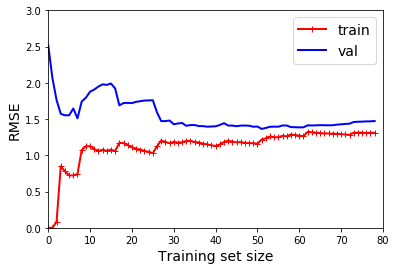

In [87]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)
plt.axis([0, 80, 0, 3])                         
plt.show()  

####### First, let’s look at the performance on the training data.
####### when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. 
####### But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. 
####### So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse.

####### Now let’s look at the performance of the model on the validation data
####### When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
####### Then as the model is shown more training examples, it learns and thus the validation error slowly goes down.
####### again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

####### These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are
close and fairly high.

####### let's check the learning curves of a 10th-degree polynomial model on the same data

In [104]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("Poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
    ))

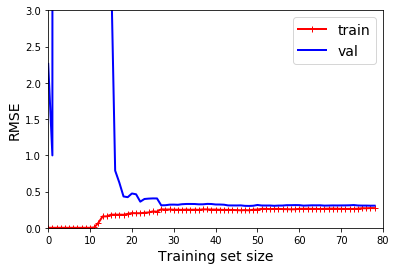

In [105]:
plot_learning_curve(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

####### The error on the training data is much lower than with the Linear Regression model

####### There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model.

####### if you used a much larger training set, the two curves would continue to get closer.

####### let's check the learning curves of a 2nd-degree polynomial model on the same data

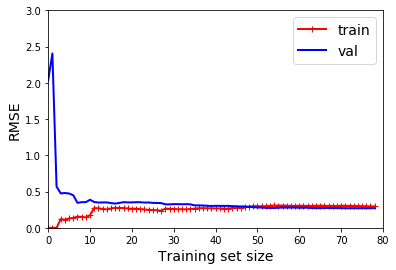

In [106]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("Poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
    ))

plot_learning_curve(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3])           
plt.show()        

####### There is quite small gap between training and validation error, though it get's close eventually

####### 2nd degree polynomial fit well, as data is derive from it.

## Regularized Linear Models

####### A good way to reduce overfitting is to regularize the model (i.e., to constrain it). The fewer degrees of freedom it has, the harder it will be for it to overfit the data
####### a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
####### For a linear model, regularization is typically achieved by constraining the weights of the model

#### Ridge Regression

####### Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression.
####### regularization term (α∑θi^2 for i= 1...n) equal to is added to the cost function, whcih forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
####### Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

####### The hyperparameter α controls how much you want to regularize the model.
####### If α = 0 then Ridge Regression is just Linear Regression.
####### If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

####### the Ridge Regression cost function is     J(θ) = MSE(θ) + (1/2) α∑θi^2      for i= 1...n
####### Note that the bias term θ0 is not regularized (the sum starts at i = 1, not 0).

####### It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features.

####### Let's perform Ridge Regression with Scikit-Learn using a matrix factorization technique by André-Louis Cholesky

In [118]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[5.36839017]])

#### Lasso Regression

####### Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression.

####### Lasso adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm

####### Lasso Regression cost function is     J(θ) = MSE(θ) + α∑|θi|         for i= 1...n


####### An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the
least important features i.e. Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

####### let's check small Scikit-Learn example using the Lasso class

In [119]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([5.32068237])

#### Elastic Net

####### Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. 
####### When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

####### Elastic Net cost function is     J(θ) = MSE(θ) + rαc|θi| + (1-r/2)α∑θi^2    for i= 1...n

####### Example using Scikit-Learn’s ElasticNet

In [120]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) ### l1_ratio corresponds to the mix ratio r
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([5.31968447])

####### when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?
####### It is almost always preferable to have at least a little bit of regularization, generally avoid plain Linear Regression
####### Ridge is a good default
####### if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed.
####### In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

#### Early Stopping

####### Another way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

####### As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set.
####### after a while the validation error stops decreasing and actually starts to go back up, indicates that the model has started to overfit the training data
####### With early stopping you just stop training as soon as the validation error reaches the minimum.

## Logistic Regression

####### Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.
####### e.g., what is the probability that this email is spam?
####### If the estimated probability is greater than 50%, then the model predicts that the instance belongs
to that class (called the positive class, labeled “1”),
####### or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### Estimating Probabilities

####### Like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of result.

####### The logistic also called the logit (noted σ(·))is a sigmoid function (i.e., S-shaped) that outputs a
number between 0 and 1. It is defined as
########                          σ(t) = 1/(1 + e^(-t))        e -> exponential

####### Logistic Regression model estimated probability (vectorized form)

#######                           p^ = σ(θ^T. X)           X -> is Input features , θ -> is weights of Input features

####### Once the Logistic Regression model has estimated the probability p^ that an instance x belongs to the positive class, it can make its prediction ŷ easily. 

#######                           ŷ = 0, if p^ < 0.5  OR    ŷ = 1, if p^ >= 0.5

####### Notice that σ(t) < 0.5 is when t < 0, and σ(t) ≥ 0.5 is when t ≥ 0
####### So Logistic Regression model predicts 1 if (θ^T · X) is positive, and 0 if (θ^T · X) is negative.

#### Training and Cost Function

####### The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). 
####### This idea is captured by the cost function of single training instance
#######                  c(θ) = - log(p^) if y = 1    OR    - log(1 - p^) if y = 0

####### AS –log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance.
####### –log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance.

####### The cost function over the whole training set is simply the average cost over all training instances. It can
be written in a single expression called the log loss.

#######            J(θ) = -(1/m)∑[( Y(i) x log(P(i)^) ) + ( (1-Y(i)) x log(1-P(i)^) )]

#### Decision Boundaries

####### Let’s use the iris dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica to illustrate Logistic Regression to build a classifier that detect the Iris-Virginica type based only on the petal width feature

In [129]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [134]:
x = iris["data"][:, 3:]  ### petal width
y = (iris["target"] == 2).astype(int)

In [135]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, y)

C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
x_new = np.linspace(0,3,1000).reshape(-1,1)
# x_new
y_proba = log_reg.predict_proba(x_new)
# y_proba

####### Let’s check at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm

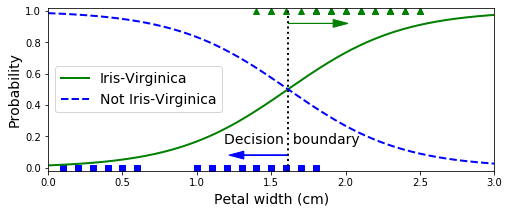

In [141]:

decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(x_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

####### The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. ####### Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). 
####### In between there is a bit of overlap where the classifier is unsure. However, to predict the class (using the predict() method rather than the predict_proba() method), it will return whichever class is the most likely.
####### Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not

####### The trained Logistic Regression classifier can estimate the probability that a new flower is an Iris-
Virginica based on these two features petal width and length

In [144]:
log_reg.predict([[1.7], [1.5]]) ### petal width and length

array([1, 0])

In [145]:
log_reg.predict([[1.2], [1.5]])

array([0, 0])

### Softmax Regression

####### The Logistic Regression model can be generalized to support multiple classes directly, without having to
train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.
####### when given an instance x, the Softmax Regression model first computes a score Sk(x) for each class k
####### then estimates the probability of each class by applying the softmax function (also called normalized exponential) to the scores
####### The equation to compute sk(x) look familiar to the equation for Linear Regression prediction.

#######                      Sk(X) = ((θ^k)^T · X)       each class has its own dedicated parameter vector (θ^k)

####### Once computed the score of every class for the instance x
####### Then estimate the probability Ṕk that the instance belongs to class k by running the scores through the softmax function. it computes the exponential of every score, then normalizes them by dividing the sum of all the
exponentials.
#######                      Ṕk = σ(S(X))k = exp(Sk(X)) / ∑ exp(Sj(X))   for j = 1...n
####### K is the number of classes
####### S(x) is a vector containing the scores of each class for the instance x. is the number of classes
####### σ(S(X))k is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.

####### Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the
highest estimated probability (which is simply the class with the highest score)
#######                Ŷ = argmax σ(S(X))k = argmax Sk(X) = argmax ((θ^k)^T · X)
####### The argmax operator returns the value of a variable that maximizes a function. In this equation, it
returns the value of k that maximizes the estimated probability σ(s(x))k.

#### Cross Entropy

####### The objective is to have a model that estimates a high probability for the target class and consequently a low probability for the other classes by minimizing the cost function.
####### Cross Entropy lead to this objective as it penalizes the model when it estimates a low probability for a target class.
#######                                                   m   k 
####### Cross Entropy cost function is      J(θ) = -(1/m) ∑   ∑  Yk^(i) log(Ṕk^(i))  
#######                                                   i=1 k=1                    

####### Yk^(i) is equal to 1 if the target class for the ith instance is k; otherwise, it is equal to 0

####### Let’s use Softmax Regression to classify the iris flowers into all three classes

In [149]:
x = iris["data"][:,(2,3)] #### Petal length and width
y = iris["target"]

####### Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression.
####### Specify a solver that supports Softmax Regression as the "lbfgs" solver.
####### It also applies ℓ2 regularization by default, which can control be using the hyperparameter C

In [150]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
softmax_reg.classes_

array([0, 1, 2])

In [158]:
softmax_reg.predict([[5, 2]]) ## iris with 5 cm long and 2 cm wide petals

array([2])

In [159]:
softmax_reg.predict_proba([[5, 2]]) 

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

####### Model predict the new data with class 2 (Iris-Virginica) with 94.25%